<a href="https://colab.research.google.com/github/Agil0509/Deep-Learning/blob/main/Deep_computer_vision_with_cnns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_sample_images
import tensorflow as tf
import matplotlib.pyplot as plt

(-0.5, 639.5, 426.5, -0.5)

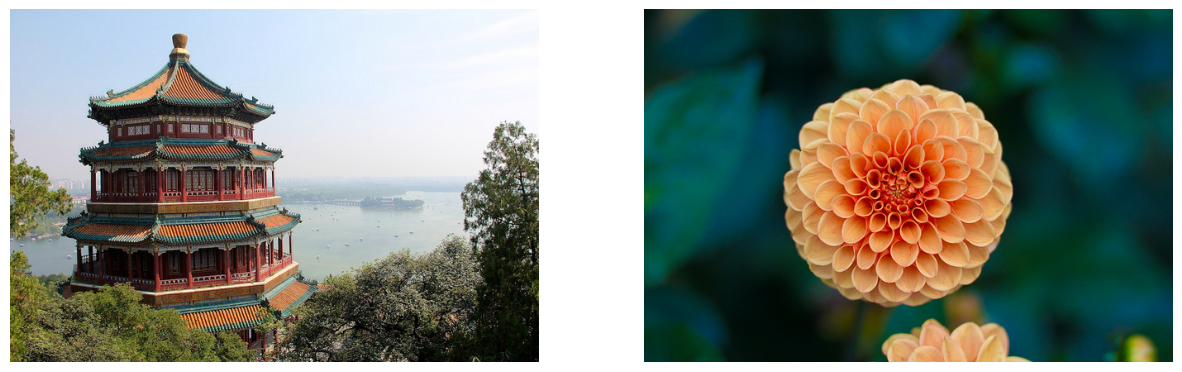

In [ ]:

images = load_sample_images()['images']
plt.figure(figsize = (15, 10))
plt.subplot(121)
plt.imshow(images[0])
plt.axis('off')
plt.subplot(122)
plt.imshow(images[1])
plt.axis('off')

(-0.5, 119.5, 69.5, -0.5)

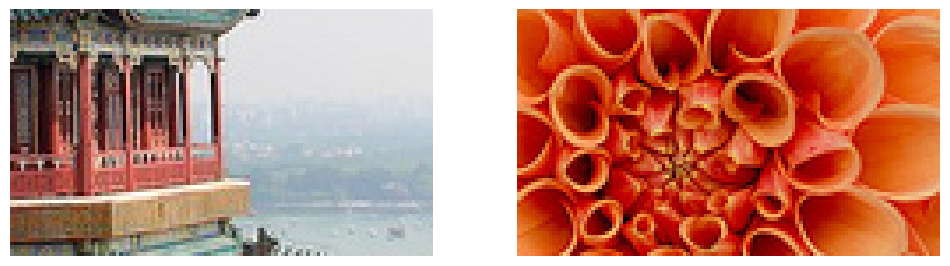

In [ ]:
images = tf.keras.layers.CenterCrop(height=70, width=120)(images)
images = tf.keras.layers.Rescaling(scale = 1/255.)(images)
plt.figure(figsize = (12, 8))
plt.subplot(121)
plt.imshow(images[0])
plt.axis('off')
plt.subplot(122)
plt.imshow(images[1])
plt.axis('off')

In [ ]:
images.shape

TensorShape([2, 70, 120, 3])

In [ ]:

tf.random.set_seed(42)
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7)
fmaps = conv_layer(images)

In [ ]:

fmaps.shape


TensorShape([2, 64, 114, 32])

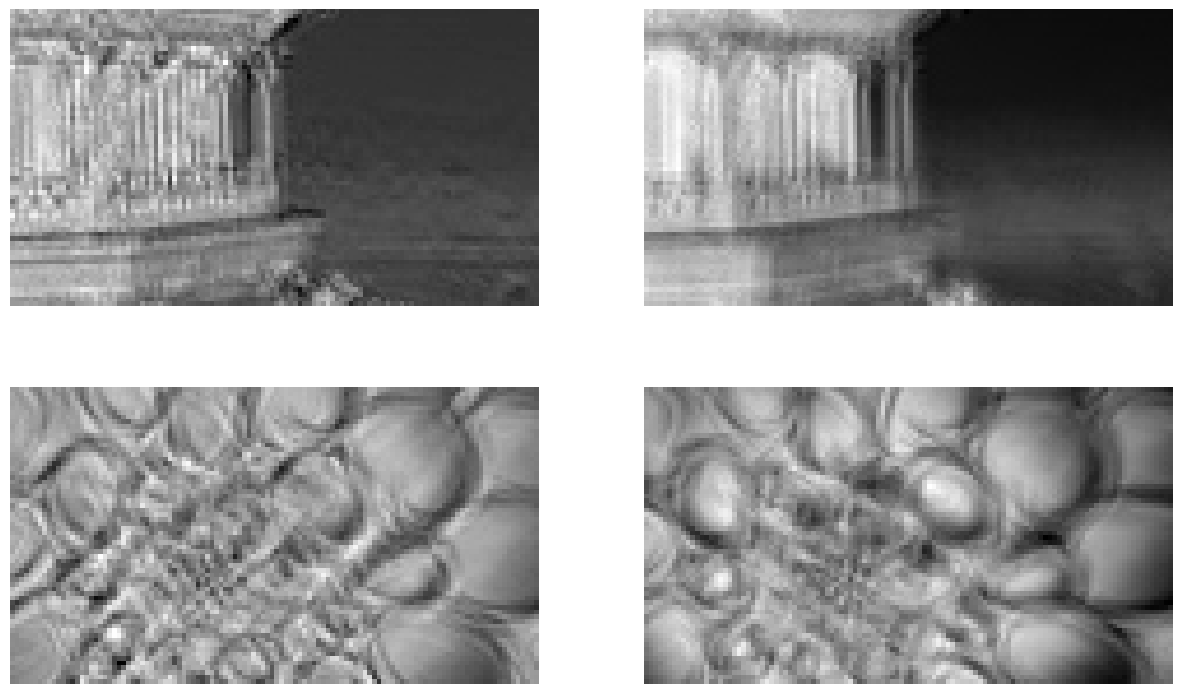

In [ ]:
plt.figure(figsize=(15, 9))
for image_idx in (0, 1):
  for fmap_idx in (0, 1):
    plt.subplot(2, 2, image_idx * 2 + fmap_idx + 1)
    plt.imshow(fmaps[image_idx, :, :, fmap_idx], cmap='gray')
    plt.axis('off')

plt.show()

In [ ]:
tf.random.set_seed(42)
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7,
                                    padding = 'same')
fmaps = conv_layer(images)

In [ ]:
fmaps.shape

TensorShape([2, 70, 120, 32])

In [ ]:
tf.random.set_seed(42)
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7,
                                    padding = 'same',strides = 2)
fmaps = conv_layer(images)

In [ ]:
fmaps.shape

TensorShape([2, 35, 60, 32])

In [ ]:
kernels,biases = conv_layer.get_weights()
kernels.shape

(7, 7, 3, 32)

In [ ]:
tf.random.set_seed(42)
filters = tf.random.normal([7,7,3,2])
biases = tf.zeros([2])
fmaps = tf.nn.conv2d(images,filters,strides= 1, padding = 'SAME')+biases

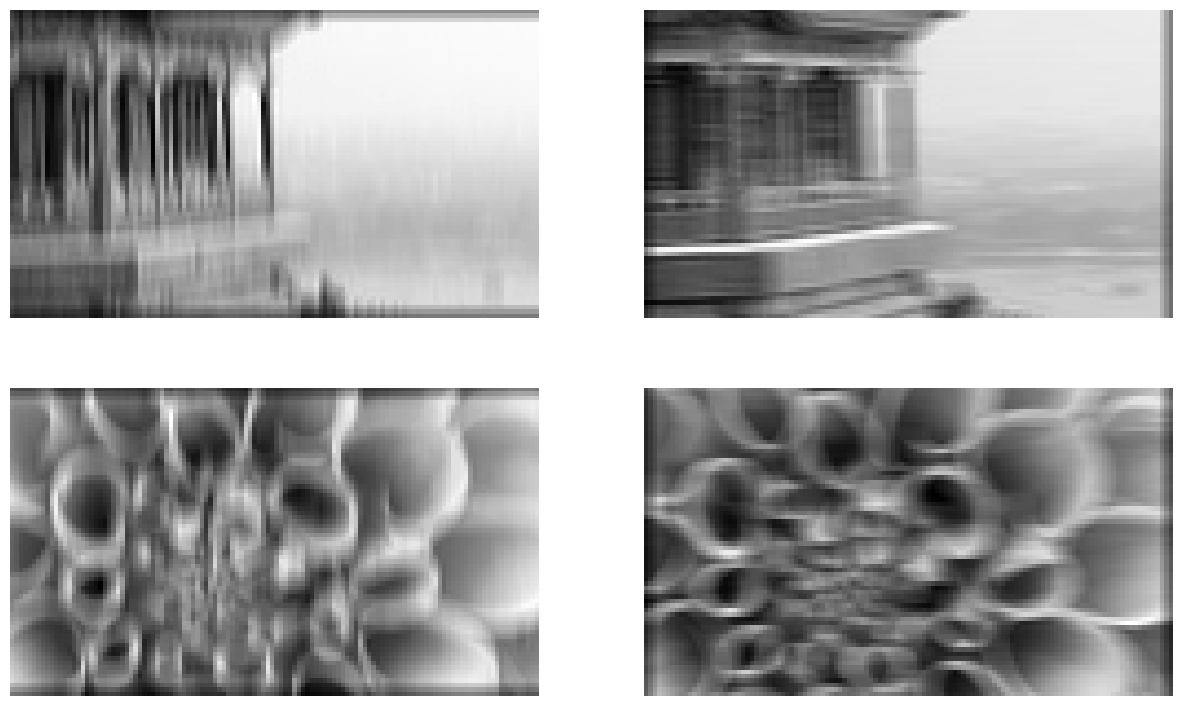

In [ ]:
import numpy as np
plt.figure(figsize = (15,9))
filters = np.zeros([7,7,3,2])
filters[:,3,:,0] = 1
filters[3,:,:,1] = 1
fmaps = tf.nn.conv2d(images,filters,strides= 1, padding = 'SAME')+biases

for image_idx in (0,1):
  for fmap_idx in (0,1):
    plt.subplot(2,2,image_idx*2+fmap_idx +1)
    plt.imshow(fmaps[image_idx,:,:,fmap_idx],cmap = 'gray')
    plt.axis('off')

plt.show()

In [ ]:
max_pool = tf.keras.layers.MaxPool2D(pool_size = 2)


In [ ]:
out_put = max_pool(images)

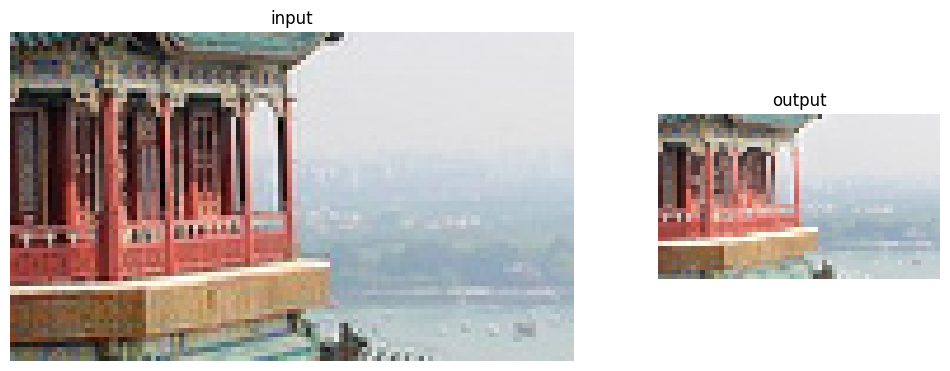

In [ ]:
import matplotlib as mpl

fig = plt.figure(figsize = (12,8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0,0])
ax1.set_title('input')
ax1.imshow(images[0])
ax1.axis('off')

ax2 = fig.add_subplot(gs[0,1])
ax2.set_title('output')
ax2.imshow(out_put[0])
ax2.axis('off')
plt.show()

In [ ]:
class DepthPool(tf.keras.layers.Layer):
  def __init__(self,pool_size = 2,**kwargs):
    super().__init__(**kwargs)
    self.pool_size  = pool_size


    def call(self,inputs):
      shape = tf.shape(inputs)
      groups = shape[-1]// self.pool_size
      new_shape = tf.concat([shape[:-1], [groups, self.pool_size]], axis=0)
      return tf.reduce_max(tf.reshape(inputs, new_shape), axis=-1)


In [ ]:
global_avg_pool = tf.keras.layers.GlobalAveragePooling2D()

In [ ]:
global_avg_pool = tf.keras.layers.Lambda(
    lambda X: tf.reduce_mean(X,axis = [1,2]))

In [ ]:
global_avg_pool(images)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.643388  , 0.59718215, 0.5825038 ],
       [0.7630747 , 0.26010972, 0.10848834]], dtype=float32)>

In [ ]:
images[0].shape,global_avg_pool(images)[0].shape

(TensorShape([70, 120, 3]), TensorShape([3]))

# CNN Architectures

In [ ]:
mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = mnist
X_train_full = np.expand_dims(X_train_full, axis=-1).astype(np.float32) / 255
X_test = np.expand_dims(X_test.astype(np.float32), axis=-1) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:

from functools import partial

tf.random.set_seed(42)
DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding='same',
                        activation='relu', kernel_initializer='he_normal')

model = tf.keras.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)
X_new = X_test[:10]
y_pred = model.predict(X_new)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.6245 - loss: 1.0691 - val_accuracy: 0.8672 - val_loss: 0.3581
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8515 - loss: 0.4409 - val_accuracy: 0.8904 - val_loss: 0.3050
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8762 - loss: 0.3620 - val_accuracy: 0.8964 - val_loss: 0.2869
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8945 - loss: 0.3180 - val_accuracy: 0.8956 - val_loss: 0.2790
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9032 - loss: 0.2857 - val_accuracy: 0.8908 - val_loss: 0.2973
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9090 - loss: 0.2648 - val_accuracy: 0.8954 - val_loss: 0.2793
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9122 - loss: 0.2525 - val_accuracy: 0.9074 - val_loss: 0.2521
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9199 - loss: 0

# ResNET-34

In [ ]:
def a(*args):
  print(args)
a(1,2,4,5)

(1, 2, 4, 5)


In [ ]:
def a(**kwargs):
  print(kwargs)
a(a = 1,b = 2,c = 4,d = 5)

{'a': 1, 'b': 2, 'c': 4, 'd': 5}


In [ ]:
DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, strides=1,
                        padding='same', kernel_initializer='he_normal',
                        use_bias=False)

class ResidualUnit(tf.keras.layers.Layer):
  def __init__(self, filters, strides=1, activation='relu', **kwargs):
    super().__init__(**kwargs)
    self.activation = tf.keras.activations.get(activation)
    self.main_layers = [
        DefaultConv2D(filters, strides=strides),
        tf.keras.layers.BatchNormalization(),
        self.activation,
        DefaultConv2D(filters),
        tf.keras.layers.BatchNormalization()
    ]
    self.skip_layers = []
    if strides > 1:
      self.skip_layers = [
          DefaultConv2D(filters, kernel_size=1, strides=strides),
          tf.keras.layers.BatchNormalization()
      ]

  def call(self, inputs):
    Z = inputs
    for layer in self.main_layers:
      Z = layer(Z)
    skip_Z = inputs
    for layer in self.skip_layers:
      skip_Z = layer(skip_Z)
    return self.activation(Z + skip_Z)


In [ ]:
model = tf.keras.Sequential([
    DefaultConv2D(64, kernel_size=7, strides=2, input_shape=[28, 28, 1]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')
])
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
  strides = 1 if filters == prev_filters else 2
  model.add(ResidualUnit(filters, strides=strides))
  prev_filters = filters

model.add(tf.keras.layers.GlobalAvgPool2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 84s 31ms/step - accuracy: 0.7660 - loss: 0.7247 - val_accuracy: 0.8490 - val_loss: 0.3942
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 0.8712 - loss: 0.3537 - val_accuracy: 0.8484 - val_loss: 0.4340
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.8770 - loss: 0.3572 - val_accuracy: 0.8314 - val_loss: 0.4907
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.8916 - loss: 0.3014 - val_accuracy: 0.8854 - val_loss: 0.3196
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 49s 27ms/step - accuracy: 0.9093 - loss: 0.2495 - val_accuracy: 0.8872 - val_loss: 0.3216
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 73s 22ms/step - accuracy: 0.9183 - loss: 0.2234 - val_accuracy: 0.8816 - val_loss: 0.3493
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9149 - loss: 0.2411 - val_accuracy: 0.8934 - val_loss: 0.3070
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 53s 30ms/step - accuracy: 0.9328 -

In [ ]:
model = tf.keras.applications.ResNet50(weights = 'imagenet')

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [ ]:
import tensorflow as tf

images = load_sample_images()['images']
images_stacked = tf.stack(images,axis = 0)
images_resize = tf.keras.layers.Resizing(height = 224,width =224,
                                         crop_to_aspect_ratio = True)(images_stacked)

(-0.5, 223.5, 223.5, -0.5)

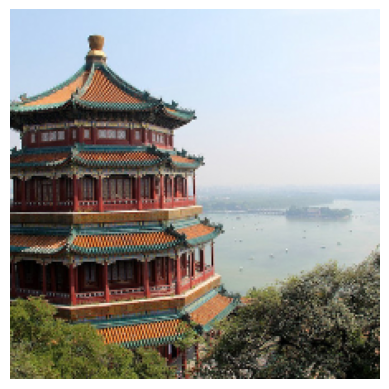

In [ ]:
plt.imshow(images_resize[0]/255)
plt.axis('off')

In [ ]:
inputs = tf.keras.applications.resnet50.preprocess_input(images_resize)

In [ ]:
y_proba = model.predict(inputs)
y_proba.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


(2, 1000)

In [ ]:
y_proba

array([[7.2768906e-09, 6.0609914e-08, 2.7514398e-08, ..., 3.2870791e-09,
        9.0070948e-08, 5.5852766e-08],
       [6.8924670e-08, 1.6536473e-05, 1.3876718e-07, ..., 2.5345031e-05,
        7.5284799e-05, 1.4423691e-04]], dtype=float32)

In [ ]:
top_K = tf.keras.applications.resnet50.decode_predictions(y_proba,top = 3) # text kimi qaytar
for image_indx in range(len(images)):
  print(f'Image # {image_indx}')
  for class_id,name,y_proba in top_K[image_indx]:
    print(f'{class_id} - {name:12s} {y_proba:.2%}') # 12s space (ellede qoymaq olar)

Image # 0
n03877845 - palace       54.44%
n03781244 - monastery    24.40%
n02825657 - bell_cote    19.04%
Image # 1
n04522168 - vase         33.38%
n11939491 - daisy        17.46%
n03530642 - honeycomb    11.46%


In [ ]:
# Pretrained model

In [ ]:
import tensorflow_datasets as tfds

dataset, info = tfds.load("tf_flowers", as_supervised=True, with_info=True)
dataset_size = info.splits["train"].num_examples
class_names = info.features["label"].names
n_classes = info.features["label"].num_classes

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [ ]:
test_set_raw,valid_set_raw,train_set_raw = tfds.load(
    'tf_flowers',
    split = ['train[:10%]','train[10%:25%]','train[25%:]'],
    as_supervised= True
)

In [ ]:
train_set_raw

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

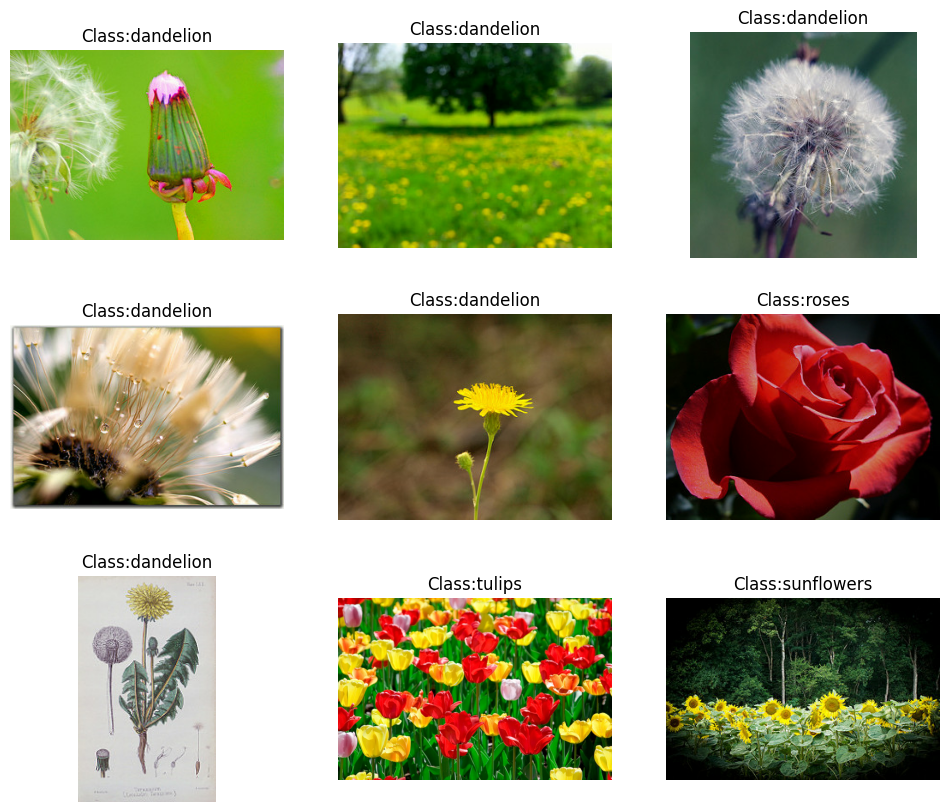

In [ ]:
plt.figure(figsize=(12,10))
index = 0
for image,label in valid_set_raw.take(9):
  index+=1
  plt.subplot(3,3,index)
  plt.imshow(image)
  plt.title(f'Class:{class_names[label]}')
  plt.axis('off')

plt.show()

In [ ]:
tf.keras.backend.clear_session()

batch_size = 32
preprocess = tf.keras.Sequential([
    tf.keras.layers.Resizing(height=224, width=224, crop_to_aspect_ratio=True),
    tf.keras.layers.Lambda(tf.keras.applications.xception.preprocess_input)
])
train_set = train_set_raw.map(lambda X, y: (preprocess(X), y))
train_set = train_set.shuffle(1000, seed=42).batch(batch_size).prefetch(1) # GPU, CPU eyni anda istifade edir
valid_set = valid_set_raw.map(lambda X, y: (preprocess(X), y)).batch(batch_size)
test_set = test_set_raw.map(lambda X, y: (preprocess(X), y)).batch(batch_size)



In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip(mode = 'horizontal',seed = 42),
    tf.keras.layers.RandomRotation(factor = 0.05,seed = 42),
    tf.keras.layers.RandomContrast(factor = 0.2,seed = 42)
])

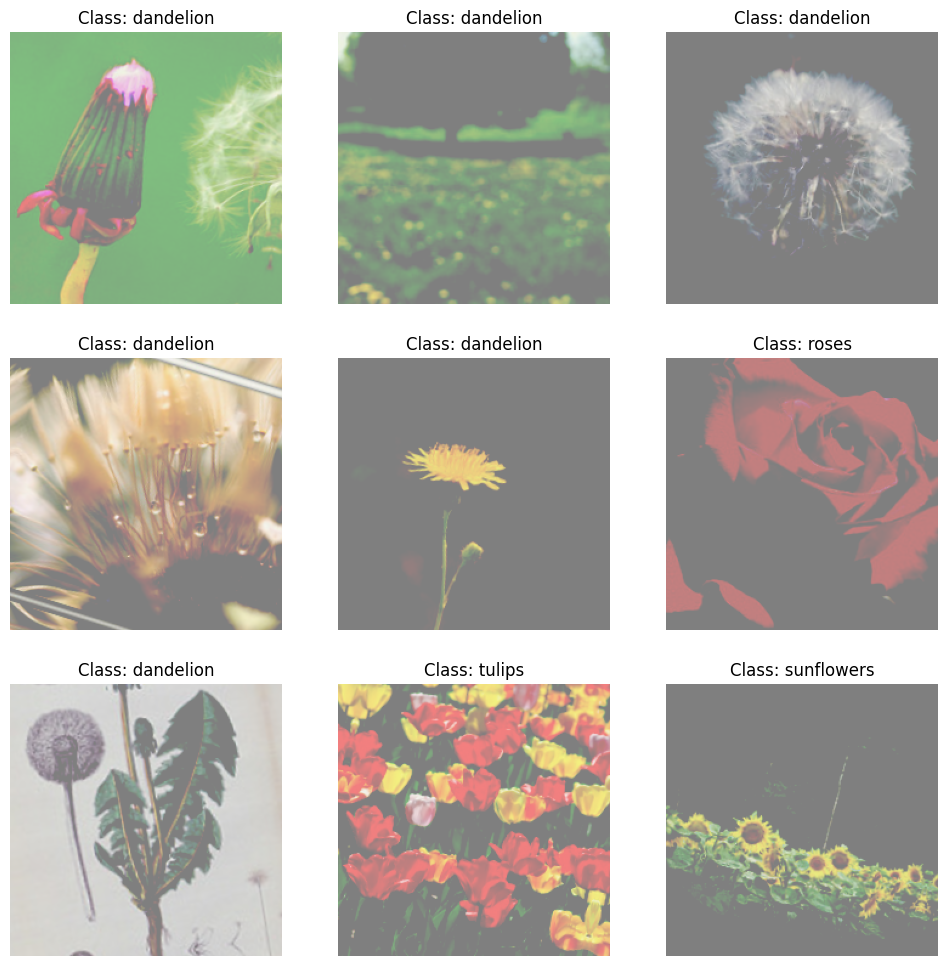

In [ ]:
plt.figure(figsize=(12, 12))
for X_batch, y_batch in valid_set.take(1):
  X_batch_augmented = data_augmentation(X_batch, training=True)
  for index in range(9):
    plt.subplot(3, 3, index+1)
    # We must rescale the images to the 0-1 range for imshow(), and also
    # clip the result to that range, because data augmentation may
    # make some values go out of bounds (e.g. RandomContrast in this case).
    plt.imshow(np.clip((X_batch_augmented[index] + 1) / 2, 0, 1))
    plt.title(f'Class: {class_names[y_batch[index]]}')
    plt.axis('off')

plt.show()

In [ ]:
tf.random.set_seed(42)

base_model = tf.keras.applications.xception.Xception(weights = 'imagenet',
                                                     include_top = False)

x= tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(n_classes,activation = 'softmax')(x)
model = tf.keras.Model(inputs=base_model.input, outputs=output)

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy'])
history = model.fit(train_set, validation_data=valid_set, epochs=3)

Epoch 1/3
86/86 ━━━━━━━━━━━━━━━━━━━━ 44s 273ms/step - accuracy: 0.7047 - loss: 0.9345 - val_accuracy: 0.8530 - val_loss: 0.6300
Epoch 2/3
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 161ms/step - accuracy: 0.8972 - loss: 0.3822 - val_accuracy: 0.8203 - val_loss: 0.9086
Epoch 3/3
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 158ms/step - accuracy: 0.9327 - loss: 0.2143 - val_accuracy: 0.8167 - val_loss: 0.8508


In [ ]:
for layer in base_model.layers[56:]:
  layer.trainable = True

optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01,momentum = 0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy'])
history = model.fit(train_set, validation_data=valid_set, epochs=10)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 60s 429ms/step - accuracy: 0.8688 - loss: 0.4157 - val_accuracy: 0.8639 - val_loss: 0.6090
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 27s 304ms/step - accuracy: 0.9825 - loss: 0.0526 - val_accuracy: 0.8911 - val_loss: 0.3892
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 28s 315ms/step - accuracy: 0.9899 - loss: 0.0304 - val_accuracy: 0.8984 - val_loss: 0.3718
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 312ms/step - accuracy: 0.9930 - loss: 0.0139 - val_accuracy: 0.9074 - val_loss: 0.3595
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 315ms/step - accuracy: 0.9945 - loss: 0.0196 - val_accuracy: 0.8984 - val_loss: 0.3904
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 310ms/step - accuracy: 0.9954 - loss: 0.0140 - val_accuracy: 0.9147 - val_loss: 0.3563
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 28s 317ms/step - accuracy: 0.9984 - loss: 0.0041 - val_accuracy: 0.9020 - val_loss: 0.3843
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 40s 308ms/step - accuracy: 0.9992 - loss: 0.0032 - val_accu